In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import os

In [2]:
data = pd.read_csv('data/Санкт-Петербург/DATTSVT.csv',index_col=False,sep='\t')

<ipython-input-2-42092d7f73d8>:1: DtypeWarning: Columns (3,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/Санкт-Петербург/DATTSVT.csv',index_col=False,sep='\t')


In [4]:
data

,napr,period,nastranapr,tnved,edizm,Stoim,Netto,Kol,Region,Region_s
0,ЭК,07/2021,AM,3506910000,NaN,"66,53",162,0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1,ЭК,09/2021,BG,3506910000,NaN,"89,7","0,4",0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2,ИМ,01/2021,BY,3506910000,NaN,"240,87","2,36",0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3,ИМ,02/2021,BY,3506910000,NaN,"1509,18","742,52",0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4,ЭК,02/2021,BY,3506910000,NaN,"487,48","116,02",0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...,...
458954,ИМ,04/2021,US,8414594000,796.0,"889,72","19,71",6,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
458955,ИМ,09/2021,US,8414108900,796.0,"2378,34","2,52",6,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
458956,ЭК,05/2021,UZ,8414108900,796.0,2416,46,1,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
458957,ИМ,01/2021,CN,8414202000,796.0,"32352,98","6692,88",41195,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [218]:
pd.DataFrame(data['napr'].value_counts())

,napr
ИМ,318489
ЭК,140470


In [219]:
pd.DataFrame(data['tnved'].value_counts())

,tnved
3926909709,1033
4016930005,792
7326909807,770
8708299009,647
8421990008,647
...,...
5509210000,1
4114101000,1
5405000000,1
2517410000,1


In [220]:
data = data.drop(['Region','Region_s'],axis=1)[data['nastranapr'].notna()]

<AxesSubplot:ylabel='nastranapr'>

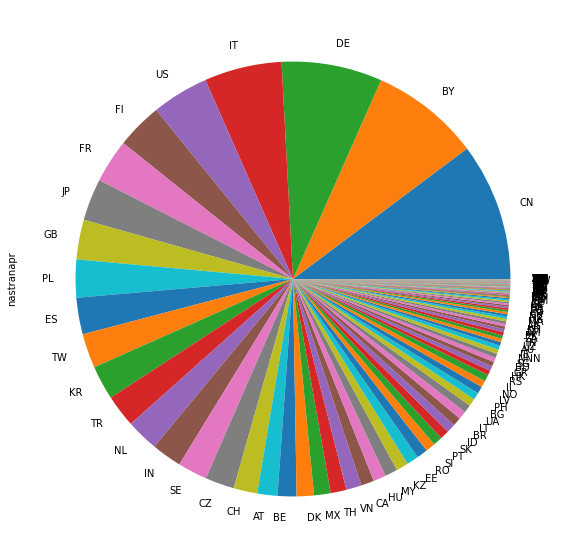

In [221]:
data.loc[data['napr'] == 'ИМ']['nastranapr'].value_counts().plot.pie(y='count', figsize=(10, 10))

In [222]:
(pd.DataFrame(data.loc[data['napr'] == 'ИМ']['nastranapr'].value_counts()))

,nastranapr
CN,32605
BY,25886
DE,23804
IT,18358
US,13469
...,...
BS,1
VI,1
KW,1
SN,1


In [223]:
un_countries = pd.unique(data.loc[data['napr'] == 'ИМ']['nastranapr'])

In [224]:
un_countries

array(['BY', 'GB', 'IN', 'JP', 'CA', 'DE', 'CH', 'CN', 'CZ', 'FR', 'AT',
       'SE', 'ID', 'US', 'IT', 'FI', 'ES', 'HU', 'IL', 'KZ', 'NL', 'BE',
       'LT', 'TR', 'PL', 'KR', 'MY', 'EE', 'GR', 'NG', 'TH', 'UA', 'LV',
       'DK', 'AU', 'IE', 'AR', 'VN', 'SI', 'TW', 'EU', 'PT', 'NO', 'SM',
       'LB', 'BR', 'SG', 'HR', 'LK', 'MX', 'EG', 'RO', 'OM', 'AE', 'SK',
       'NNN', 'RS', 'MC', 'PE', 'ZA', 'BG', 'SA', 'MG', 'LU', 'PH', 'CR',
       'HK', 'KG', 'NZ', 'BA', 'CI', 'SO', 'CL', 'UY', 'PY', 'AM', 'FO',
       'MA', 'BO', 'EC', 'GL', 'BD', 'MR', 'MU', 'CO', 'UZ', 'MD', 'GE',
       'KE', 'PK', 'MK', 'MW', 'MZ', 'TM', 'AZ', 'TZ', 'ZM', 'ZW', 'DO',
       'TN', 'AB', 'GT', 'NP', 'GH', 'ET', 'NI', 'SZ', 'IS', 'KH', 'DZ',
       'HN', 'PG', 'SV', 'TJ', 'UG', 'SD', 'RW', 'MT', 'BH', 'MM', 'ER',
       'LI', 'AL', 'CY', 'JO', 'ME', 'LA', 'HT', 'CM', 'MN', 'AD', 'VI',
       'SL', 'ML', 'MO', 'BB', 'FK', 'TD', 'PA', 'NE', 'QA', 'MQ', 'PR',
       'TK', 'LS', 'BM', 'DM', 'CC', 'GA', 'KP', '

In [225]:
dict_of_cn_st = {}

In [226]:
for c in un_countries:
    dict_of_cn_st[c] = np.round(data['Stoim'].str.replace(',', '.').astype(float)[(data.nastranapr == c)].sum(),3)

In [227]:
dict_of_cn_st = {k: v for k, v in sorted(dict_of_cn_st.items(), key=lambda item: item[1])}

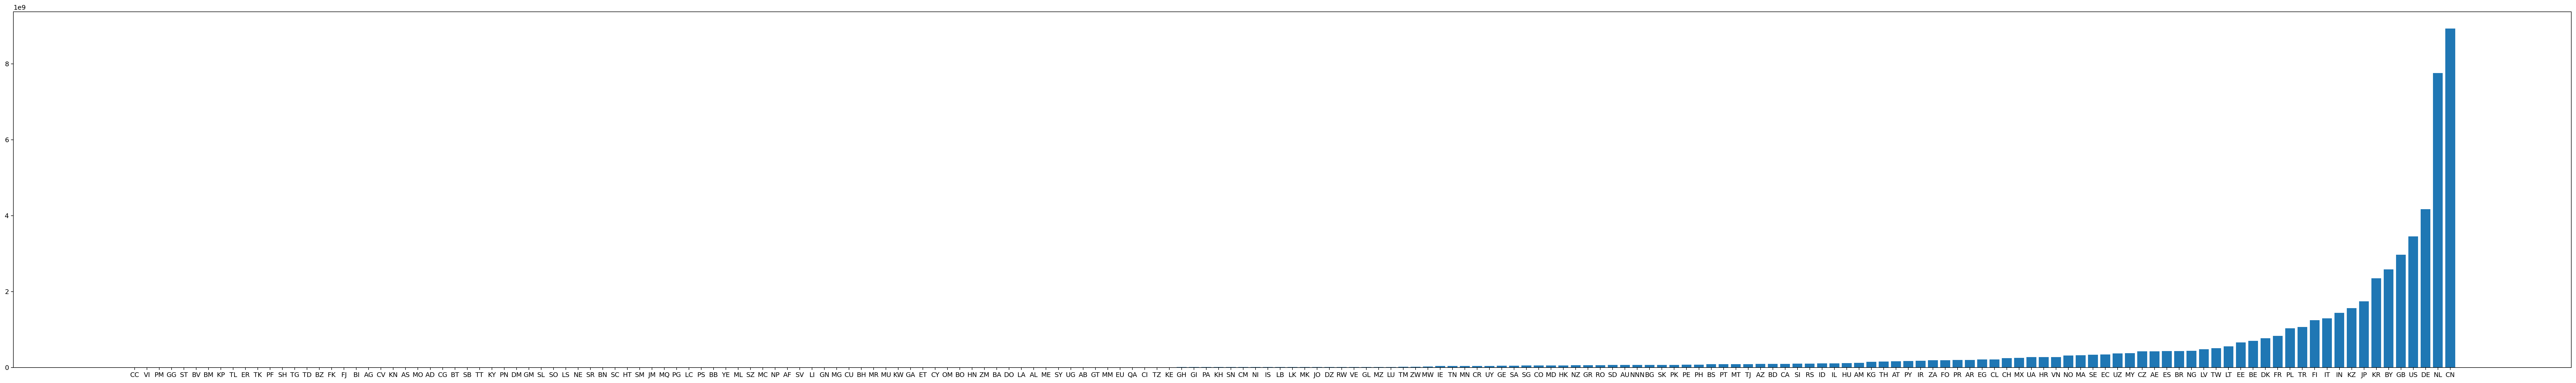

In [232]:
plt.figure(figsize=(70, 10), dpi=180)
plt.bar(list(dict_of_cn_st.keys()), dict_of_cn_st.values())
plt.show()

AttributeError: 'Rectangle' object has no property 'ylabel'

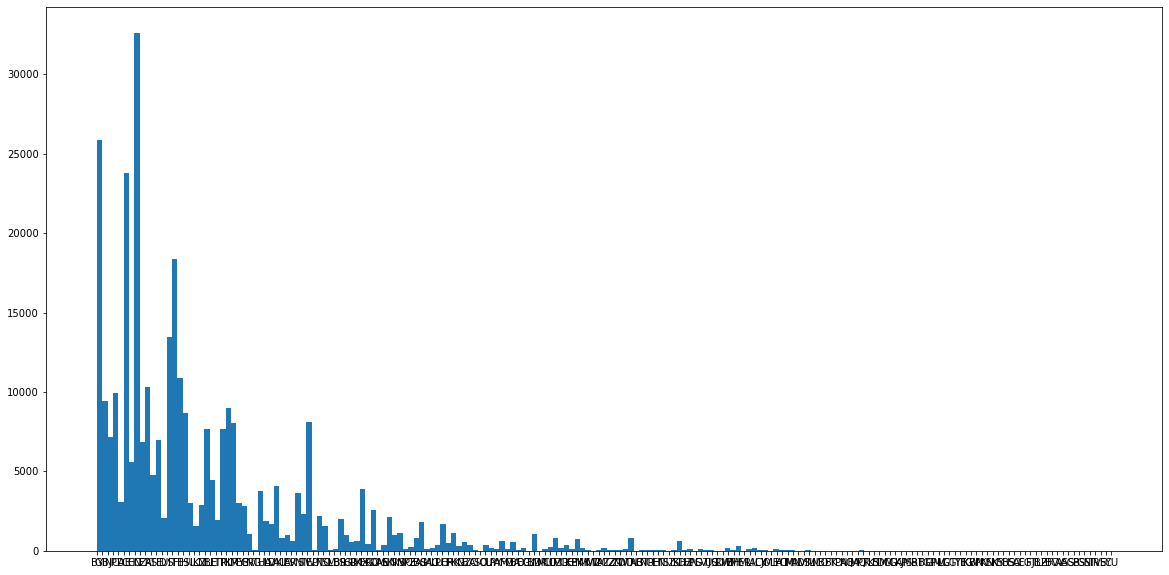

In [233]:
data.loc[data['napr'] == 'ИМ']['nastranapr'].hist(xrot=90, figsize=(20,10),grid=False,bins=len(data.loc[data['napr'] == 'ИМ']['nastranapr'].unique()),ax=()'dfd')

# Alsu     Data Preporation

In [3]:
dirpath = './data'
file_list = os.listdir(dirpath)

In [34]:
df = pd.DataFrame()
for filename in os.listdir(dirpath):
    filepath = os.path.join(dirpath, filename, 'DATTSVT.csv')
    data_new = pd.read_csv(filepath, sep='\t')
    
    df = pd.concat([df, data_new])
        
df

<ipython-input-34-345f7e928bda>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_new = pd.read_csv(filepath, sep='\t')
<ipython-input-34-345f7e928bda>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_new = pd.read_csv(filepath, sep='\t')
<ipython-input-34-345f7e928bda>:4: DtypeWarning: Columns (3,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_new = pd.read_csv(filepath, sep='\t')
<ipython-input-34-345f7e928bda>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_new = pd.read_csv(filepath, sep='\t')
<ipython-input-34-345f7e928bda>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_new = pd.read_csv(filepath, sep='\t')
<ipython-input-34-345f7e928bda>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype optio

,napr,period,nastranapr,tnved,edizm,Stoim,Netto,Kol,Region,Region_s
0,ИМ,04/2021,US,3506100000,NaN,2475,"0,816",0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1,ИМ,10/2021,GB,3507909000,NaN,1188,"0,03",0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2,ИМ,08/2021,IL,3507909000,NaN,340,"0,03",0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3,ЭК,04/2021,KZ,3808932700,NaN,268979,69120,0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4,ЭК,04/2021,KZ,3707100000,NaN,"412,45",2,0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...,...
12409,ИМ,05/2021,DE,3814009000,NaN,"1841,93",286,0,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
12410,ИМ,11/2021,PK,3907690000,NaN,"120663,27",122800,0,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
12411,ИМ,05/2021,BY,3907690000,NaN,"76242,34",81533,0,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
12412,ИМ,06/2021,CN,3907610000,NaN,"50716,95",44000,0,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [35]:
df = df.reset_index(drop=True)
df

,napr,period,nastranapr,tnved,edizm,Stoim,Netto,Kol,Region,Region_s
0,ИМ,04/2021,US,3506100000,NaN,2475,"0,816",0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1,ИМ,10/2021,GB,3507909000,NaN,1188,"0,03",0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2,ИМ,08/2021,IL,3507909000,NaN,340,"0,03",0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3,ЭК,04/2021,KZ,3808932700,NaN,268979,69120,0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4,ЭК,04/2021,KZ,3707100000,NaN,"412,45",2,0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...,...
4913021,ИМ,05/2021,DE,3814009000,NaN,"1841,93",286,0,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4913022,ИМ,11/2021,PK,3907690000,NaN,"120663,27",122800,0,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4913023,ИМ,05/2021,BY,3907690000,NaN,"76242,34",81533,0,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4913024,ИМ,06/2021,CN,3907610000,NaN,"50716,95",44000,0,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [36]:
df.describe()

,edizm
count,1.609125e+06
mean,7.146864e+02
std,2.237820e+02
min,6.000000e+00
25%,7.960000e+02
50%,7.960000e+02
75%,7.960000e+02
max,8.650000e+02


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913026 entries, 0 to 4913025
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   napr        object 
 1   period      object 
 2   nastranapr  object 
 3   tnved       object 
 4   edizm       float64
 5   Stoim       object 
 6   Netto       object 
 7   Kol         object 
 8   Region      object 
 9   Region_s    object 
dtypes: float64(1), object(9)
memory usage: 374.8+ MB


Переведем колличественные характеристики в колонки с подходящим типом данных (числовым)

In [51]:
df['Stoim'] = df['Stoim'].apply(lambda x: float(x.replace(',', '.')))
type(df.Stoim[0])

numpy.float64

In [52]:
df['Netto'] = df['Netto'].apply(lambda x: float(x.replace(',', '.')))
type(df.Netto[0])

numpy.float64

In [53]:
df['Kol'] = df['Kol'].apply(lambda x: float(x.replace(',', '.')) if type(x) == str else float(x))
type(df.Kol[0])

numpy.float64

In [54]:
cols = df.columns
for col in cols:
    print(f"Характеристика: {col}")
    print(f"Количество уникальных значений: {df[col].nunique()}")
#     print(f"Список значений: {df[col]}")
#     print(df[col])
    print('///////////////////////////////////////////////////')

Характеристика: napr
Количество уникальных значений: 2
///////////////////////////////////////////////////
Характеристика: period
Количество уникальных значений: 12
///////////////////////////////////////////////////
Характеристика: nastranapr
Количество уникальных значений: 244
///////////////////////////////////////////////////
Характеристика: tnved
Количество уникальных значений: 20351
///////////////////////////////////////////////////
Характеристика: Stoim
Количество уникальных значений: 2240610
///////////////////////////////////////////////////
Характеристика: Netto
Количество уникальных значений: 1328508
///////////////////////////////////////////////////
Характеристика: Kol
Количество уникальных значений: 181513
///////////////////////////////////////////////////
Характеристика: Region
Количество уникальных значений: 85
///////////////////////////////////////////////////
Характеристика: Region_s
Количество уникальных значений: 8
////////////////////////////////////////////////

## Data Cleaning

In [39]:
print('Размер выбоpки: {}, {}'.format(df.shape[0], df.shape[1]))

Размер выбоpки: 4913026, 10


Исследуем датасет на наличие пропусков

In [40]:
df.isna().sum()

napr                0
period              0
nastranapr        239
tnved               0
edizm         3303901
Stoim               0
Netto               0
Kol                 0
Region              0
Region_s            0
dtype: int64

In [41]:
df.edizm

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
4913021   NaN
4913022   NaN
4913023   NaN
4913024   NaN
4913025   NaN
Name: edizm, Length: 4913026, dtype: float64

In [42]:
df[df.edizm.isna() == True]

,napr,period,nastranapr,tnved,edizm,Stoim,Netto,Kol,Region,Region_s
0,ИМ,04/2021,US,3506100000,NaN,2475,"0,816",0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1,ИМ,10/2021,GB,3507909000,NaN,1188,"0,03",0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2,ИМ,08/2021,IL,3507909000,NaN,340,"0,03",0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3,ЭК,04/2021,KZ,3808932700,NaN,268979,69120,0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4,ЭК,04/2021,KZ,3707100000,NaN,"412,45",2,0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...,...
4913021,ИМ,05/2021,DE,3814009000,NaN,"1841,93",286,0,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4913022,ИМ,11/2021,PK,3907690000,NaN,"120663,27",122800,0,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4913023,ИМ,05/2021,BY,3907690000,NaN,"76242,34",81533,0,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4913024,ИМ,06/2021,CN,3907610000,NaN,"50716,95",44000,0,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


Построим на матрицу заполненности датасета

<AxesSubplot: >

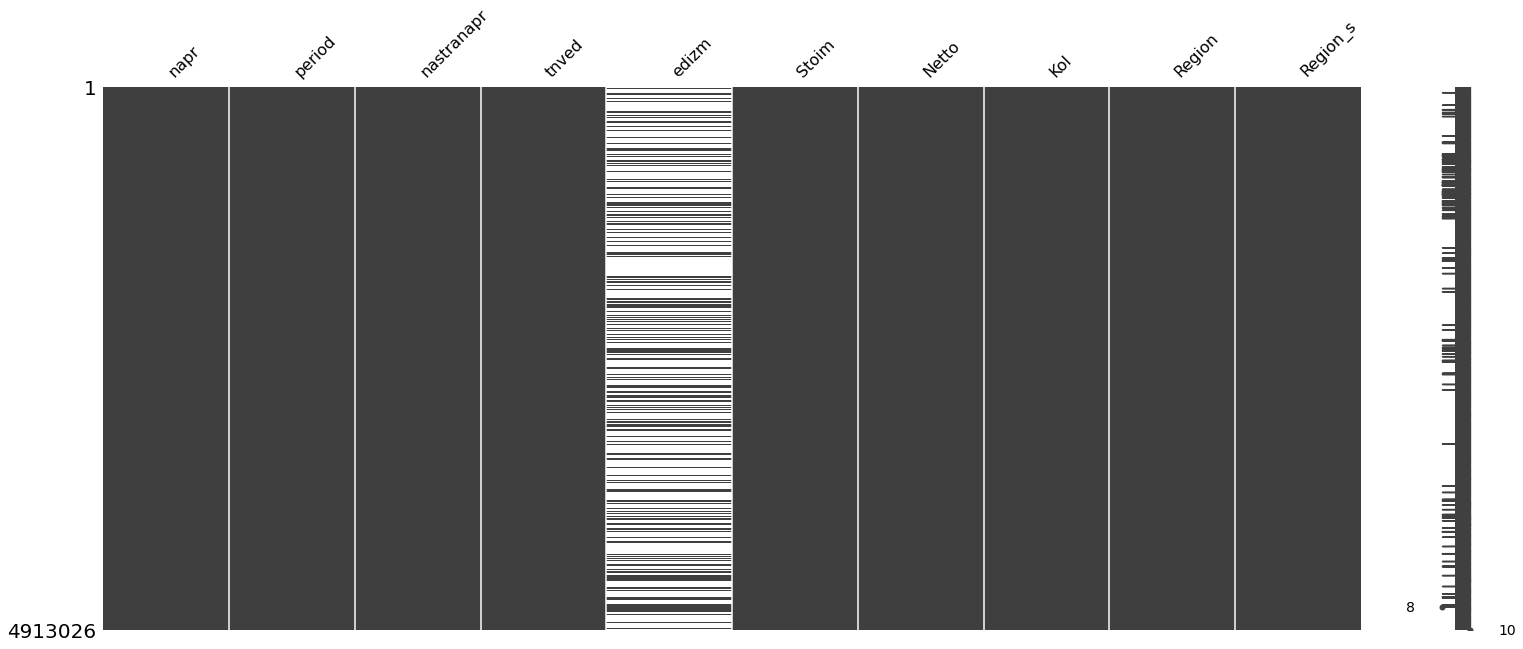

In [43]:
msno.matrix(df)

<AxesSubplot: >

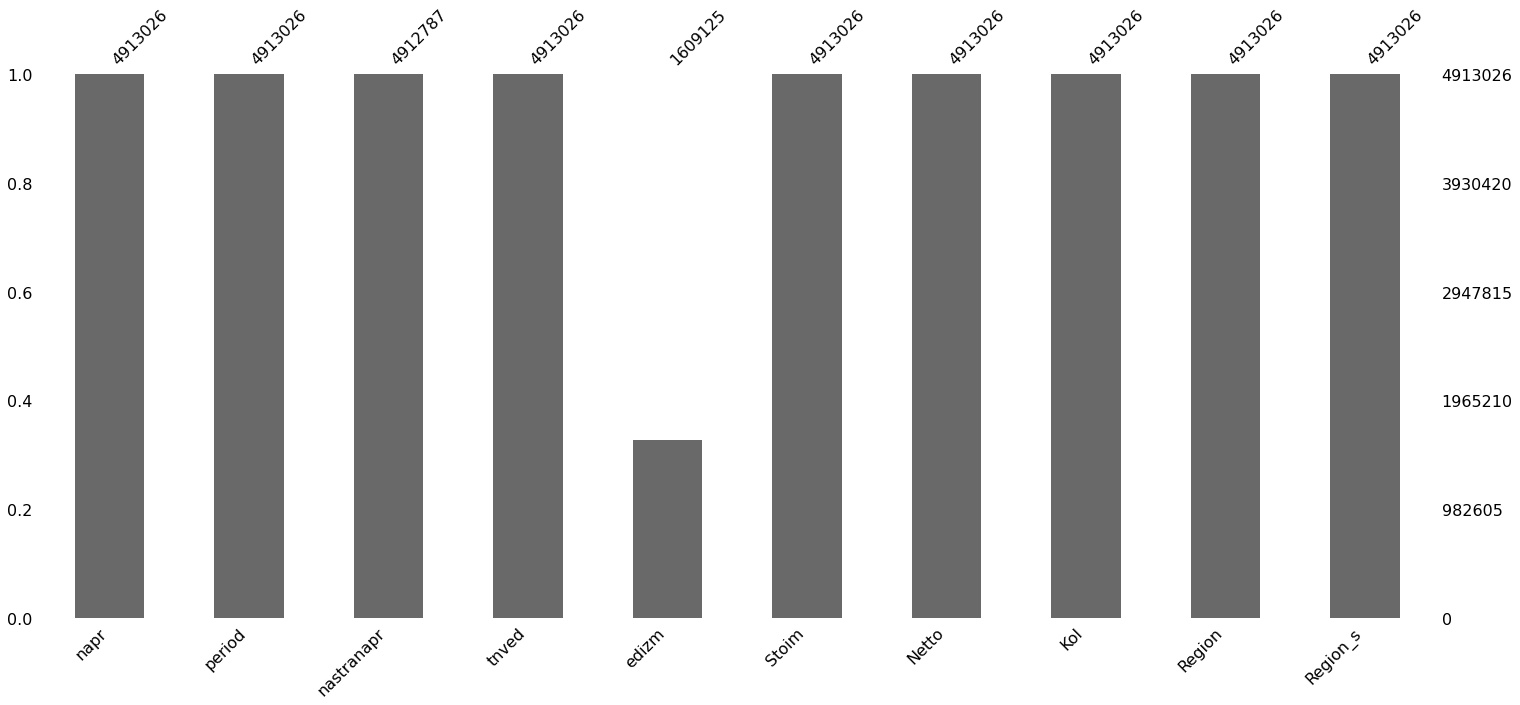

In [44]:
msno.bar(df)

Удаляем колонку "edizm" тк она имеет большое кол-во пропусков, что ухудшит результат исследования

In [45]:
df = df.drop('edizm', axis=1)
df = df

### nastranapr

Посмотрим внимательнее на пропуски в колонке "nastranapr"

In [49]:
df[df.nastranapr.isna() == True]

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
54410,ЭК,05/2021,NaN,8402900001,"18713,04",4300,0,67000 - СЕВАСТОПОЛЬ - ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
167768,ЭК,02/2021,NaN,8708299009,1446,17,0,73000 - УЛЬЯНОВСКАЯ ОБЛАСТЬ,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
207883,ИМ,02/2021,NaN,806101000,"46106,69","17879,5",0,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
208802,ЭК,08/2021,NaN,1001990000,"3815668,75",15392100,0,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
233808,ЭК,02/2021,NaN,1001990000,"4435771,7",17370980,0,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
4682974,ИМ,12/2021,NaN,7325999009,"3400,13","38,543",0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4690884,ИМ,08/2021,NaN,8501310000,"85,57","0,02",1,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4692139,ИМ,11/2021,NaN,8501522001,"1206,23",55,2,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4703717,ЭК,11/2021,NaN,9705000000,3340,12,0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [56]:
nastranapr_nan = df[df.nastranapr.isna() == True]


In [62]:
nastranapr_nan[nastranapr_nan.napr == 'ИМ']

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
207883,ИМ,02/2021,NaN,806101000,46106.69,17879.500,0.0,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
246473,ИМ,07/2021,NaN,9705000000,5995.69,100.000,0.0,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
246474,ИМ,10/2021,NaN,9705000000,18120.00,298.000,0.0,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
269738,ИМ,01/2021,NaN,0806101000,83680.80,35945.500,0.0,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
725971,ИМ,02/2021,NaN,806101000,123140.50,71539.500,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
4623072,ИМ,08/2021,NaN,3920208000,2540.17,2.000,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4682974,ИМ,12/2021,NaN,7325999009,3400.13,38.543,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4690884,ИМ,08/2021,NaN,8501310000,85.57,0.020,1.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4692139,ИМ,11/2021,NaN,8501522001,1206.23,55.000,2.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [63]:
nastranapr_nan[nastranapr_nan.Stoim > 100000]

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
208802,ЭК,08/2021,NaN,1001990000,3815668.75,15392100.0,0.0,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
233808,ЭК,02/2021,NaN,1001990000,4435771.70,17370980.0,0.0,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
725971,ИМ,02/2021,NaN,806101000,123140.50,71539.5,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
870961,ИМ,12/2021,NaN,806101000,130823.74,73677.0,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
943683,ЭК,12/2021,NaN,4911990000,1340887.24,5760.0,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
950368,ИМ,01/2021,NaN,806101000,156246.17,89519.2,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1552550,ЭК,04/2021,NaN,3102309000,359792.69,1800000.0,613200.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1552551,ЭК,09/2021,NaN,3102309000,271724.97,1000000.0,340000.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1552552,ЭК,12/2021,NaN,3102309000,826677.40,2498750.0,849575.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1569015,ЭК,06/2021,NaN,3102309000,307687.39,1304500.0,444740.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


Оставим данные по импрорту и экспорту с большими значениями стоимости, тк они могут внести существенный вклад в статистику

In [69]:
# df = df.dropna()
df = pd.concat([df, nastranapr_nan[nastranapr_nan.Stoim > 100000]])
df

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
0,ИМ,04/2021,US,3506100000,2475.00,0.816,0.0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1,ИМ,10/2021,GB,3507909000,1188.00,0.030,0.0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2,ИМ,08/2021,IL,3507909000,340.00,0.030,0.0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3,ЭК,04/2021,KZ,3808932700,268979.00,69120.000,0.0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4,ЭК,04/2021,KZ,3707100000,412.45,2.000,0.0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
1552550,ЭК,04/2021,NaN,3102309000,359792.69,1800000.000,613200.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1552551,ЭК,09/2021,NaN,3102309000,271724.97,1000000.000,340000.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1552552,ЭК,12/2021,NaN,3102309000,826677.40,2498750.000,849575.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1569015,ЭК,06/2021,NaN,3102309000,307687.39,1304500.000,444740.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


Посмотрим как теперь изменился наш датасет

In [70]:
pd.DataFrame(df['napr'].value_counts())

,napr
ИМ,2920056
ЭК,1992742


In [71]:
pd.DataFrame(df['tnved'].value_counts())

,tnved
3926909709,13398
7326909807,11247
4016930005,9632
3926909709,9013
7326909409,8411
...,...
4808400001,1
2009491100,1
8418610011,1
307879000,1


<AxesSubplot: ylabel='nastranapr'>

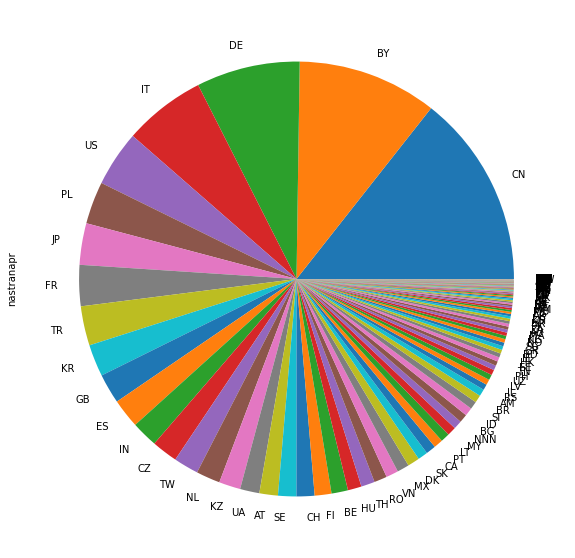

In [72]:
df.loc[df['napr'] == 'ИМ']['nastranapr'].value_counts().plot.pie(y='count', figsize=(10, 10))

<AxesSubplot: ylabel='nastranapr'>

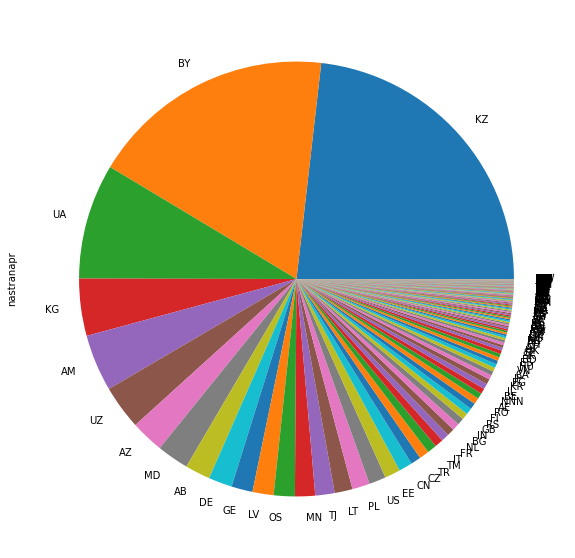

In [73]:
df.loc[df['napr'] == 'ЭК']['nastranapr'].value_counts().plot.pie(y='count', figsize=(10, 10))

### Выбросы

In [74]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

#### Stoim

In [75]:
boundaries = calculate_outliers(df.Stoim)
boundaries

(-30619.016249999997, 51985.93375)

In [76]:
if df.Stoim.max() < boundaries[1]:
    print('максимум входит в границы')
else:
    print('максимум не входит в границы')
    
if df.Stoim.min() > boundaries[0]:
    print('минимум входит в границы')
else:
    print('минимум не входит в границы')
    
#Посчитаем и выведем количество выбросов
is_outlier = (df.Stoim < boundaries[0]) | (df.Stoim > boundaries[1]) 
print('количество выбросов -', is_outlier.sum())
#Посчитаем и выведем долю выбросов
print(is_outlier.sum() / len(df.Stoim))

максимум не входит в границы
минимум входит в границы
количество выбросов - 768671
0.15646297690236807


In [77]:
df[is_outlier]

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
3,ЭК,04/2021,KZ,3808932700,268979.00,69120.00,0.0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
11,ЭК,12/2021,KZ,3907610000,67279.59,39600.00,0.0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
12,ЭК,08/2021,KZ,3916200000,274423.55,147480.00,0.0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
14,ИМ,07/2021,IT,3824994500,60044.09,7493.22,0.0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
27,ЭК,05/2021,TM,3811900000,622734.37,284160.00,0.0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
1552550,ЭК,04/2021,NaN,3102309000,359792.69,1800000.00,613200.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1552551,ЭК,09/2021,NaN,3102309000,271724.97,1000000.00,340000.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1552552,ЭК,12/2021,NaN,3102309000,826677.40,2498750.00,849575.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1569015,ЭК,06/2021,NaN,3102309000,307687.39,1304500.00,444740.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [78]:
df[df.Stoim < 0]

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s


In [79]:
print(df.Stoim.max())
print(df.Stoim.min())

2723443497.78
0.0


Text(0.5, 1.0, 'Ящик с усами для стоимости (с аномалиями)')

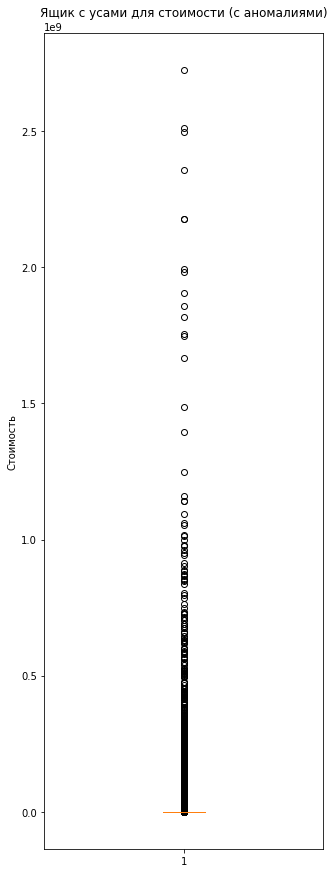

In [80]:
fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(df.Stoim)
ax.set_ylabel('Стоимость')
ax.set_title('Ящик с усами для стоимости (с аномалиями)')


Провели исследование при помощи интерквантильного исследоввания данных, а также построили график показывающй большое кол-во объектом, стоимость которых не входит в нормальное распределение

### Netto

In [81]:
boundaries = calculate_outliers(df.Netto)
boundaries

(-4115.925, 6885.555)

In [82]:
print(df.Netto.max())
print(df.Netto.min())

4764780935.0
0.0


In [83]:
if df.Netto.max() < boundaries[1]:
    print('максимум входит в границы')
else:
    print('максимум не входит в границы')
    
if df.Netto.min() > boundaries[0]:
    print('минимум входит в границы')
else:
    print('минимум не входит в границы')
    
#Посчитаем и выведем количество выбросов
is_outlier = (df.Netto < boundaries[0]) | (df.Netto > boundaries[1]) 
print('количество выбросов -', is_outlier.sum())
#Посчитаем и выведем долю выбросов
print(is_outlier.sum() / len(df.Netto))

максимум не входит в границы
минимум входит в границы
количество выбросов - 918712
0.18700382144757427


Text(0.5, 1.0, 'Ящик с усами для стоимости (с аномалиями)')

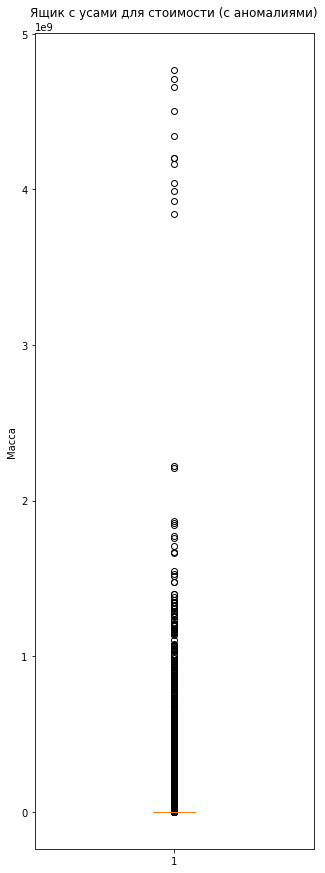

In [85]:
fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(df.Netto)
ax.set_ylabel('Масса')
ax.set_title('Ящик с усами для стоимости (с аномалиями)')

Провели исследование при помощи интерквантильного исследоввания данных, а также построили график показывающй большое кол-во объектом, масса которых не входит в нормальное распределение

### Kol

In [87]:
boundaries = calculate_outliers(df.Kol)
boundaries

(-7.5, 12.5)

In [88]:
print(df.Kol.max())
print(df.Kol.min())

185445750000.0
0.0


In [89]:
if df.Kol.max() < boundaries[1]:
    print('максимум входит в границы')
else:
    print('максимум не входит в границы')
    
if df.Kol.min() > boundaries[0]:
    print('минимум входит в границы')
else:
    print('минимум не входит в границы')
    
#Посчитаем и выведем количество выбросов
is_outlier = (df.Kol < boundaries[0]) | (df.Kol > boundaries[1]) 
print('количество выбросов -', is_outlier.sum())
#Посчитаем и выведем долю выбросов
print(is_outlier.sum() / len(df.Kol))

максимум не входит в границы
минимум входит в границы
количество выбросов - 1056818
0.21511529682270675


Text(0.5, 1.0, 'Ящик с усами для стоимости (с аномалиями)')

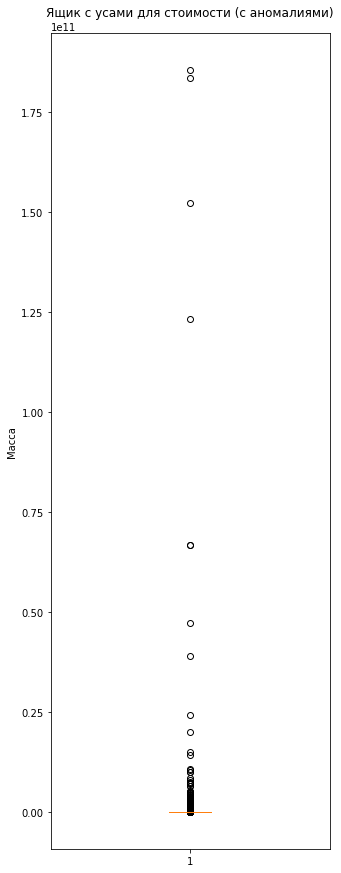

In [90]:
fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(df.Kol)
ax.set_ylabel('Масса')
ax.set_title('Ящик с усами для стоимости (с аномалиями)')

Провели исследование при помощи интерквантильного исследоввания данных, а также построили график показывающй большое кол-во объектом, кол-во которых не входит в нормальное распределение

In [220]:
df[is_outlier].sort_values(by='Kol').tail(15)

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
1914584,ИМ,10/2021,ES,0106490009,1990.49,20.000,1.000002e+10,14000 - БЕЛГОРОДСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
965077,ИМ,03/2021,UA,0106900090,335817.83,10152.450,1.050776e+10,14000 - БЕЛГОРОДСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4514409,ИМ,01/2021,BE,106490009,65826.56,865.000,1.081401e+10,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4181021,ИМ,02/2021,NL,106900090,18908.83,200.800,1.420910e+10,46000 - МОСКОВСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
49834,ИМ,06/2021,ES,0106490009,10229.17,56.000,1.500070e+10,14000 - БЕЛГОРОДСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
983485,ИМ,11/2021,ES,0106490009,3850.56,50.000,2.000000e+10,14000 - БЕЛГОРОДСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
49448,ИМ,08/2021,GB,0106900090,31953.36,1387.510,2.422620e+10,14000 - БЕЛГОРОДСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1910328,ИМ,07/2021,GB,0106900090,36315.28,1444.110,3.893875e+10,14000 - БЕЛГОРОДСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4181026,ИМ,08/2021,NL,106900090,29645.71,196.396,4.719700e+10,46000 - МОСКОВСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
675080,ИМ,03/2021,BE,106490009,68486.52,427.000,6.677476e+10,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [221]:
df[is_outlier].sort_values(by='Stoim').tail(15)

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
4924863,ЭК,10/2021,GB,7108120001,6.317942e+08,11120.046,11120045.2,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4619829,ЭК,09/2021,GB,7108120001,6.588994e+08,11465.906,11465905.4,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4918778,ЭК,06/2021,GB,7108120001,6.737871e+08,11358.518,11358516.3,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
425196,ЭК,06/2021,GB,7108120001,6.737871e+08,11358.518,11358516.3,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4788176,ЭК,07/2021,GB,7108120001,6.758748e+08,11672.747,11672744.8,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3944383,ИМ,11/2021,CN,8517120000,6.817774e+08,1038290.849,2930658.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4923328,ЭК,07/2021,GB,7108120001,6.903352e+08,11944.995,11944995.2,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
700705,ЭК,07/2021,GB,7108120001,6.903352e+08,11944.995,11944995.2,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2178683,ЭК,06/2021,GB,7108120001,7.977482e+08,13264.832,13264831.8,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4570400,ИМ,12/2021,CN,8517120000,9.019182e+08,1179454.204,3105806.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [92]:
df[is_outlier].sort_values(by='Netto').tail(15)

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
1682123,ЭК,04/2021,FR,2711110000,9.062346e+07,6.613130e+08,1.515643e+06,71140 - ЯМАЛО-НЕНЕЦКИЙ АВТОНОМНЫЙ ОКРУГ (ТЮМЕН...,05-УРАЛЬСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1682122,ЭК,08/2021,FR,2711110000,1.466894e+08,6.652430e+08,1.522195e+06,71140 - ЯМАЛО-НЕНЕЦКИЙ АВТОНОМНЫЙ ОКРУГ (ТЮМЕН...,05-УРАЛЬСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1033416,ИМ,12/2021,KZ,2711210000,0.000000e+00,6.853077e+08,7.959438e+08,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1034942,ИМ,05/2021,KZ,2711210000,0.000000e+00,6.903497e+08,7.935054e+08,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1034938,ИМ,03/2021,KZ,2711210000,0.000000e+00,7.010835e+08,8.123795e+08,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1034954,ИМ,11/2021,KZ,2711210000,0.000000e+00,7.025889e+08,8.150683e+08,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1034936,ИМ,02/2021,KZ,2711210000,0.000000e+00,7.171061e+08,8.290244e+08,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1034934,ИМ,01/2021,KZ,2711210000,0.000000e+00,8.009300e+08,9.280765e+08,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2889764,ЭК,09/2021,BR,3104205000,2.431091e+08,8.010268e+08,4.839038e+08,57000 - ПЕРМСКИЙ КРАЙ,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1682126,ЭК,04/2021,CN,2711110000,1.467358e+08,8.033880e+08,1.841385e+06,71140 - ЯМАЛО-НЕНЕЦКИЙ АВТОНОМНЫЙ ОКРУГ (ТЮМЕН...,05-УРАЛЬСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [93]:
df.describe()

,Stoim,Netto,Kol
count,4.912798e+06,4.912798e+06,4.912798e+06
mean,1.599524e+05,2.125053e+05,2.781210e+05
std,5.622380e+06,1.041056e+07,1.575172e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.578400e+02,9.630000e+00,0.000000e+00
50%,2.750780e+03,1.520000e+02,0.000000e+00
75%,2.100908e+04,2.760000e+03,5.000000e+00
max,2.723443e+09,4.764781e+09,1.854458e+11


In [94]:
df[df.Netto == 0.0].Stoim.max()

1857349836.76

In [95]:
df[df.Netto == 0.0]

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
261217,ИМ,02/2021,AM,6203423100,1127.00,0.0,166.00,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
261452,ИМ,02/2021,AM,6204621100,383.00,0.0,46.00,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
282256,ЭК,12/2021,BG,0403101100,83.04,0.0,0.00,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
398795,ИМ,03/2021,CH,8424890009,4083.05,0.0,3.00,61000 - РЯЗАНСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
428800,ЭК,05/2021,CZ,9018908409,1443.00,0.0,2.00,61000 - РЯЗАНСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
4797155,ИМ,04/2021,FI,2716000000,3961.96,0.0,27.02,41000 - ЛЕНИНГРАДСКАЯ ОБЛАСТЬ,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4797156,ИМ,11/2021,FI,2716000000,4401.36,0.0,32.33,41000 - ЛЕНИНГРАДСКАЯ ОБЛАСТЬ,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4814124,ИМ,06/2021,FI,2716000000,1280.77,0.0,8.08,41000 - ЛЕНИНГРАДСКАЯ ОБЛАСТЬ,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4825022,ИМ,02/2021,FI,2716000000,7504.62,0.0,52.69,41000 - ЛЕНИНГРАДСКАЯ ОБЛАСТЬ,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [32]:
df[df.Netto == 0.0].describe()

,edizm,Stoim,Netto,Kol
count,590.000000,7.490000e+02,749.0,7.490000e+02
mean,173.296610,1.517939e+07,0.0,2.729715e+08
std,103.671752,7.828047e+07,0.0,6.605713e+08
min,113.000000,0.000000e+00,0.0,0.000000e+00
25%,113.000000,0.000000e+00,0.0,9.440000e+00
50%,113.000000,1.505000e+02,0.0,4.207379e+05
75%,246.000000,2.634686e+06,0.0,2.254161e+08
max,796.000000,1.857350e+09,0.0,4.898462e+09


In [96]:
print('Stoim = 0:', df[df.Stoim == 0.0].Stoim.count())
print('Netto = 0:', df[df.Netto == 0.0].Netto.count())
print('Kol = 0:', df[df.Kol == 0.0].Kol.count())

Stoim = 0: 430
Netto = 0: 749
Kol = 0: 3259686


Большие значения массы совпадают с большими значениями стоимости и количества - выделить в отдельный кластер!

0.0 в колонке Stoim, Netto - удалить (скорее всего незаполненные данные)

0.0 в колонке Kol - надо подумать

### Исследуем отдельно нули в каждой колонке

In [97]:
df[df.Stoim == 0.]     

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
376283,ЭК,04/2021,TJ,7214991000,0.0,6.869500e+04,0.0,75000 - ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,05-УРАЛЬСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
927283,ЭК,12/2021,UA,8546200000,0.0,4.332000e+02,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
936407,ИМ,12/2021,US,3904692000,0.0,1.780000e+00,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1033416,ИМ,12/2021,KZ,2711210000,0.0,6.853077e+08,795943849.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1033417,ЭК,12/2021,KZ,2711210000,0.0,0.000000e+00,683073167.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
4707398,ЭК,01/2021,CH,2711210000,0.0,0.000000e+00,33995451.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4707399,ЭК,02/2021,CH,2711210000,0.0,0.000000e+00,30705213.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4707400,ЭК,03/2021,CH,2711210000,0.0,0.000000e+00,33833263.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4722095,ЭК,06/2021,FR,8481309108,0.0,8.000000e-01,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


Эти значния не имеют для нас статистической значимости, удалим их

In [103]:
netto_0 = df[df.Netto == 0.]
netto_0_im = netto_0[netto_0.napr == 'ИМ']

In [104]:
netto_0[netto_0.Stoim > 1000000]

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
645607,ЭК,10/2021,FI,2716000000,2.745490e+06,0.0,45772.01,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
724481,ЭК,06/2021,FI,2716000000,4.020636e+06,0.0,71922.00,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
791278,ЭК,04/2021,FI,2716000000,1.834976e+06,0.0,50000.36,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
791279,ЭК,09/2021,FI,2716000000,3.704629e+06,0.0,44554.12,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
797954,ЭК,07/2021,FI,2716000000,6.159611e+06,0.0,80203.58,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
4705470,ЭК,10/2021,SI,XXXXXXXXXX,1.769837e+07,0.0,0.00,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4705471,ЭК,04/2021,SK,XXXXXXXXXX,7.741779e+07,0.0,0.00,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4705472,ЭК,07/2021,SK,XXXXXXXXXX,1.005122e+08,0.0,0.00,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4705477,ЭК,09/2021,AT,XXXXXXXXXX,3.136772e+08,0.0,0.00,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [105]:
netto_0_im[netto_0_im.Stoim > 100000] # оставляем!

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
1033444,ИМ,02/2021,KZ,XXXXXXXXXX,1.176386e+07,0.0,0.00,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1033541,ИМ,01/2021,KZ,XXXXXXXXXX,1.830167e+07,0.0,0.00,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1033543,ИМ,05/2021,KZ,XXXXXXXXXX,1.295001e+07,0.0,0.00,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1033544,ИМ,06/2021,KZ,XXXXXXXXXX,1.179290e+07,0.0,0.00,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1033545,ИМ,07/2021,KZ,XXXXXXXXXX,1.162841e+07,0.0,0.00,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1033724,ИМ,11/2021,KZ,XXXXXXXXXX,1.593459e+07,0.0,0.00,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1033782,ИМ,03/2021,KZ,XXXXXXXXXX,1.152767e+07,0.0,0.00,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1034170,ИМ,08/2021,KZ,XXXXXXXXXX,9.497577e+06,0.0,0.00,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3716169,ИМ,01/2021,AZ,2716000000,2.953705e+05,0.0,7158.35,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3716171,ИМ,05/2021,AZ,2716000000,3.342710e+05,0.0,8221.70,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


Оставим в выборке объекты импорта с значениями с нулевой массой, но большой стоимостью, остальные нулевые значения массы удалим

In [109]:
df[df.Kol == 0.] 

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
0,ИМ,04/2021,US,3506100000,2475.00,0.816,0.0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1,ИМ,10/2021,GB,3507909000,1188.00,0.030,0.0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2,ИМ,08/2021,IL,3507909000,340.00,0.030,0.0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3,ЭК,04/2021,KZ,3808932700,268979.00,69120.000,0.0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4,ЭК,04/2021,KZ,3707100000,412.45,2.000,0.0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
1033544,ИМ,06/2021,KZ,XXXXXXXXXX,11792902.27,0.000,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1033545,ИМ,07/2021,KZ,XXXXXXXXXX,11628412.73,0.000,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1033724,ИМ,11/2021,KZ,XXXXXXXXXX,15934585.11,0.000,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1033782,ИМ,03/2021,KZ,XXXXXXXXXX,11527665.77,0.000,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


Слишком большое кол-во 0 (незаполненные данных). Их нельзя восстановить или удалить полностью. Не будем рассматривать эту колонку

Удаление статистически незначимых данных

In [106]:
df = df[df.Stoim != 0.] 

In [107]:
df = df[df.Netto != 0.]
df = pd.concat([df, netto_0_im[netto_0_im.Stoim > 100000]])

In [111]:
df = df.drop('Kol', axis=1)

In [112]:
df.shape

(4912007, 8)

## Исследование зависимостей

<AxesSubplot: ylabel='nastranapr'>

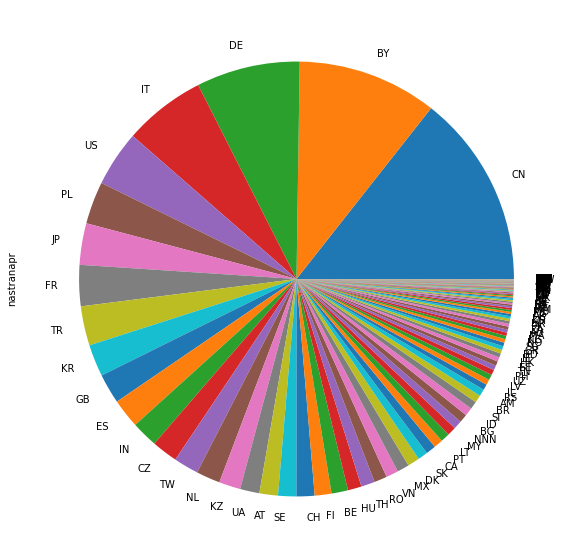

In [113]:
df.loc[df['napr'] == 'ИМ']['nastranapr'].value_counts().plot.pie(y='count', figsize=(10, 10))

<AxesSubplot: ylabel='tnved'>

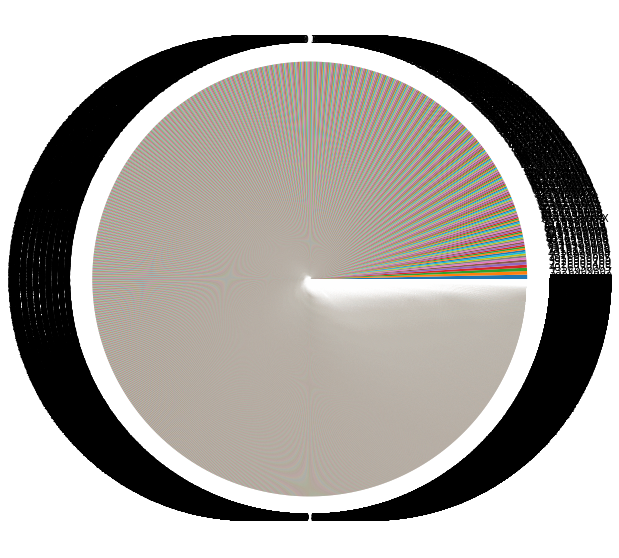

In [115]:
df.loc[df['napr'] == 'ИМ']['tnved'].value_counts().plot.pie(y='count', figsize=(10, 10))

In [116]:
df.head(3)

,napr,period,nastranapr,tnved,Stoim,Netto,Region,Region_s
0,ИМ,04/2021,US,3506100000,2475.0,0.816,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1,ИМ,10/2021,GB,3507909000,1188.0,0.030,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2,ИМ,08/2021,IL,3507909000,340.0,0.030,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [122]:
stats_napr_Stoim = df.groupby(['napr'], as_index=False)[['Stoim']].sum()
print(stats_napr_Stoim)
print('///////////////////')

stats_napr_Netto = df.groupby(['napr'], as_index=False)[['Netto']].sum()
print(stats_napr_Netto)
print('///////////////////')


  napr         Stoim
0   ИМ  2.934989e+11
1   ЭК  4.810530e+11
///////////////////
  napr         Netto
0   ИМ  1.237537e+11
1   ЭК  9.131299e+11
///////////////////


In [123]:
df_im = df[df.napr == 'ИМ']
df_im.head(4)

,napr,period,nastranapr,tnved,Stoim,Netto,Region,Region_s
0,ИМ,04/2021,US,3506100000,2475.00,0.816,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1,ИМ,10/2021,GB,3507909000,1188.00,0.030,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2,ИМ,08/2021,IL,3507909000,340.00,0.030,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
7,ИМ,08/2021,FR,3822000000,2022.65,2.800,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [124]:
stats_period_Stoim = df_im.groupby(['period'], as_index=False)[['Stoim']].sum()
print(stats_period_Stoim)
print('////////////////////////////')

stats_period_Netto = df_im.groupby(['period'], as_index=False)[['Netto']].sum()
print(stats_period_Netto)
print('////////////////////////////')

     period         Stoim
0   01/2021  1.683366e+10
1   02/2021  2.058003e+10
2   03/2021  2.497571e+10
3   04/2021  2.531261e+10
4   05/2021  2.391060e+10
5   06/2021  2.483599e+10
6   07/2021  2.542813e+10
7   08/2021  2.512218e+10
8   09/2021  2.458946e+10
9   10/2021  2.561294e+10
10  11/2021  2.682942e+10
11  12/2021  2.946816e+10
////////////////////////////
     period         Netto
0   01/2021  8.227678e+09
1   02/2021  8.107209e+09
2   03/2021  1.044103e+10
3   04/2021  1.088377e+10
4   05/2021  1.086642e+10
5   06/2021  1.126510e+10
6   07/2021  1.081306e+10
7   08/2021  1.062652e+10
8   09/2021  1.044692e+10
9   10/2021  1.049461e+10
10  11/2021  1.074384e+10
11  12/2021  1.083758e+10
////////////////////////////


Text(0.5, 0, 'период')

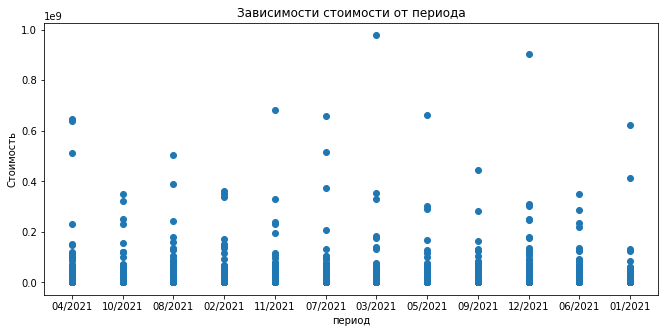

In [125]:
plt.figure(figsize=(11, 5))
plt.scatter(df_im['period'], df_im['Stoim'],)
plt.title('Зависимости стоимости от периода')
plt.ylabel('Стоимость')
plt.xlabel('период')

Text(0.5, 0, 'период')

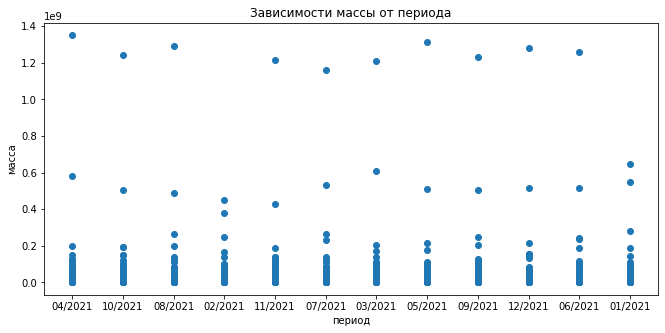

In [131]:
plt.figure(figsize=(11, 5))
plt.scatter(df_im['period'], df_im['Netto'],)
plt.title('Зависимости массы от периода')
plt.ylabel('масса')
plt.xlabel('период')

In [127]:
stats_nastranapr_Stoim = df_im.groupby(['nastranapr'], as_index=False)[['Stoim']].sum()
print(stats_nastranapr_Stoim)
print('////////////////////////////')

stats_nastranapr_Netto = df_im.groupby(['nastranapr'], as_index=False)[['Netto']].sum()
print(stats_nastranapr_Netto)
print('////////////////////////////')


    nastranapr         Stoim
0           AB  7.023239e+07
1           AD  4.976562e+04
2           AE  2.763072e+08
3           AF  4.722184e+06
4           AG  1.918170e+03
..         ...           ...
231         WF  1.185190e+03
232         YE  1.573317e+05
233         ZA  7.968769e+08
234         ZM  1.575014e+07
235         ZW  3.484610e+07

[236 rows x 2 columns]
////////////////////////////
    nastranapr         Netto
0           AB  6.722306e+07
1           AD  6.096535e+02
2           AE  6.972772e+07
3           AF  3.627590e+06
4           AG  8.372000e+01
..         ...           ...
231         WF  5.653255e+00
232         YE  2.161264e+04
233         ZA  1.316557e+09
234         ZM  5.104551e+06
235         ZW  9.454271e+06

[236 rows x 2 columns]
////////////////////////////


In [130]:
df_im.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919972 entries, 0 to 4672765
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   napr        object 
 1   period      object 
 2   nastranapr  object 
 3   tnved       object 
 4   Stoim       float64
 5   Netto       float64
 6   Region      object 
 7   Region_s    object 
dtypes: float64(2), object(6)
memory usage: 200.5+ MB


In [132]:
df_im[type(df_im['nastranapr']) == float]

KeyError: False

TypeError: 'value' must be an instance of str or bytes, not a float

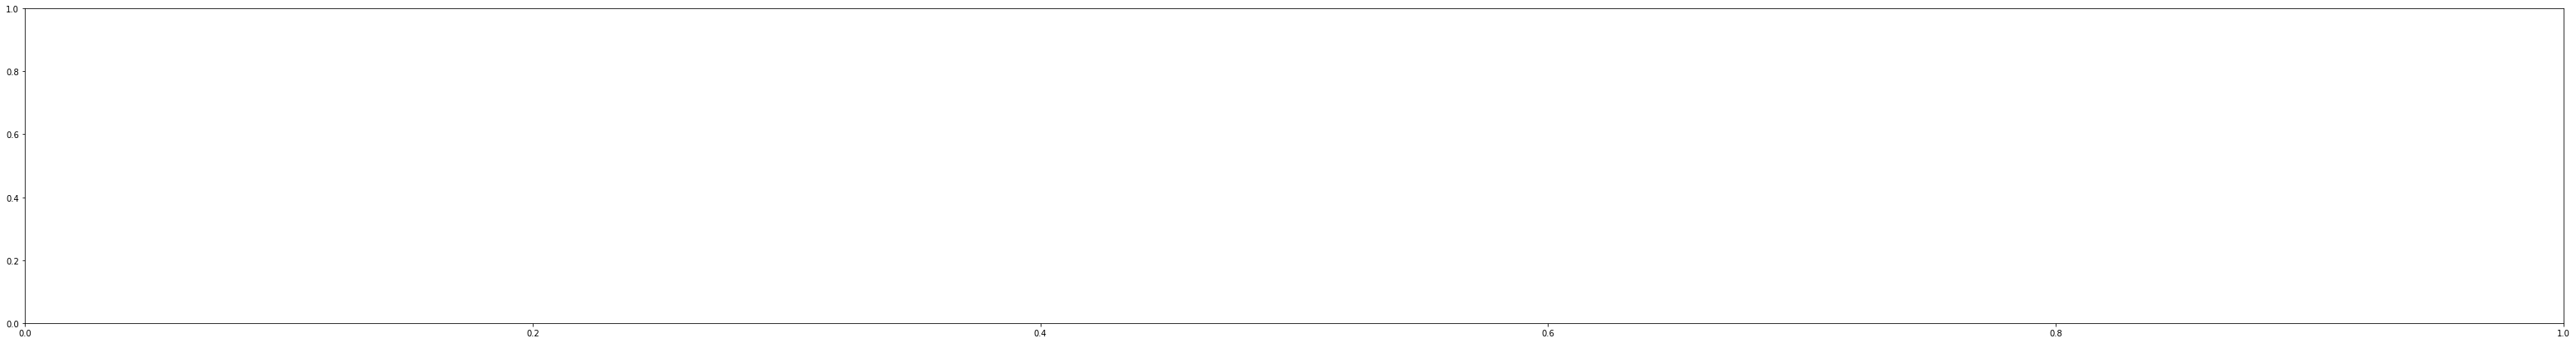

In [135]:
plt.figure(figsize=(55, 7))
plt.scatter(df['nastranapr'], df['Stoim'],)
plt.title('Зависимости стоимости от nastranapr')
plt.ylabel('Стоимость')
plt.xlabel('nastranapr')

TypeError: 'value' must be an instance of str or bytes, not a float

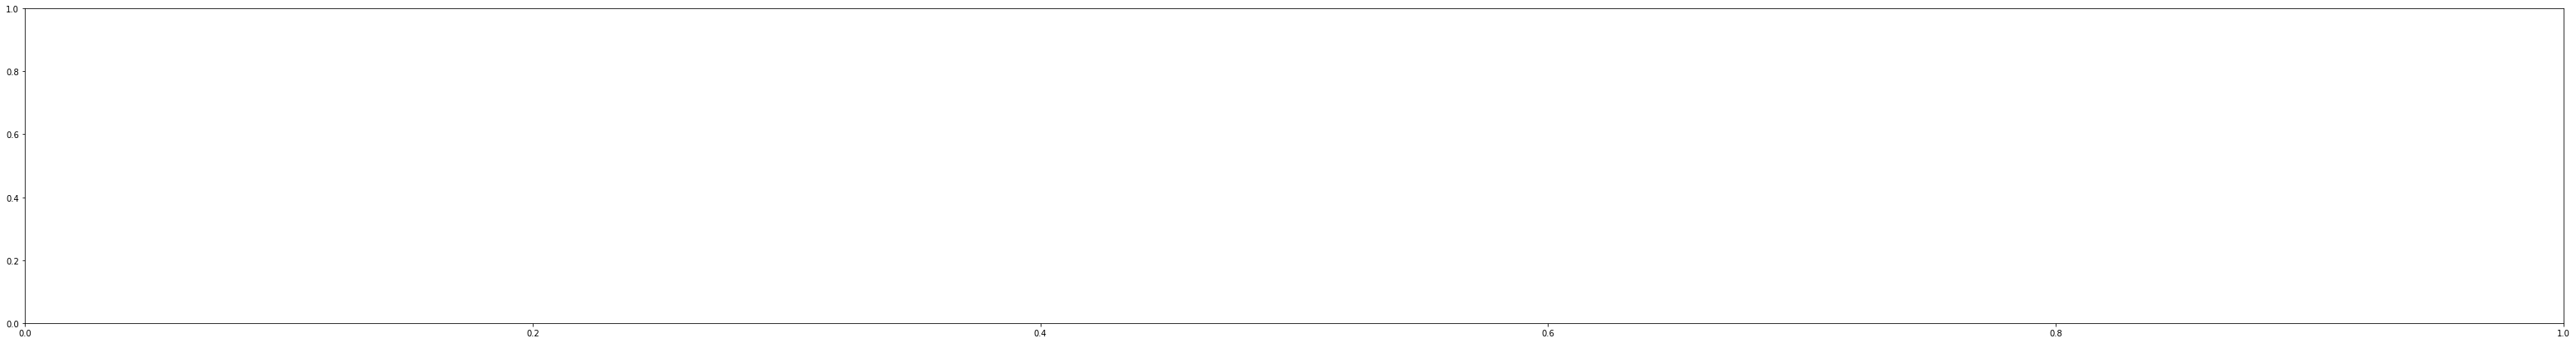

In [129]:
plt.figure(figsize=(55, 7))
plt.scatter(df_im['nastranapr'], df_im['Netto'],)
plt.title('Зависимости массы от nastranapr')
plt.ylabel('масса')
plt.xlabel('nastranapr')

диаграммы для ниш (название ниши / стоимость (масса))
разделить графики на экспорт и импорт
посмотреть пропуски и нули:
 - 
 -
 -
хороший ноутбук ()